# VisClaw.jl - examples of usage

<div style="text-align: right;"> VisClaw.jl v0.3.1 </div>
<div style="text-align: right;"> Clawpack v5.6.1 </div>
<div style="text-align: right;"> Takuya Miyashita (miyashita@hydrocoast.jp) </div>

## Load conditions and numerical results 
This process is the same as [Examples using Plots.jl](https://github.com/hydrocoast/visclaw_julia/blob/master/Example_using_Plots.ipynb).

In [1]:
using VisClaw
using GMT: GMT
using Printf

simdir = joinpath(CLAW, "geoclaw/examples/tsunami/chile2010/_output")
topo = loadtopo(simdir)

# check
println(typeof(topo))
println(fieldnames(typeof(topo)))

VisClaw.Topo
(:ncols, :nrows, :x, :y, :dx, :dy, :elevation)


## Plot using GMT
### topo

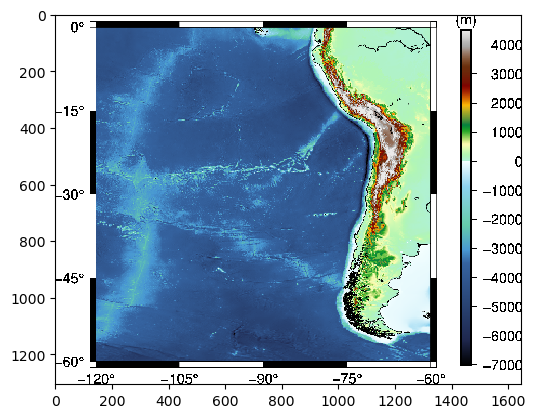

-JX10.0d/10.0d
-R-120.0/-60.0/-60.0/0.0


PyObject <matplotlib.image.AxesImage object at 0x7f9f8913f750>

In [2]:
# makegrd
G = geogrd(topo; V=true)

# makecpt
cpt = GMT.makecpt(; C=:earth, T="-7000/4500", D=true)

# commom options: projection J and region R
region = getR(topo)
proj = getJ("X10d", axesratio(topo))

# check
println("-J"*proj)
println("-R"*region)

# plot
GMT.grdimage(G, C=cpt, J=proj, R=region, Q=true, V=true)
GMT.colorbar!(J=proj, R=region, B="xa1000f1000 y+l\"(m)\"", D="jBR+w10.0/0.3+o-1.2/-0.1", V=true)
GMT.coast!(J=proj, R=region, B="a15f15 neSW", D=:i, W=:thinnest, V=true, fmt="PDF")

# show
PS = GMT.fname_out(Dict())[1]
I = GMT.psconvert("-TG -E300 -A $PS")
using PyPlot
PyPlot.imshow(I.image)

### dtopo

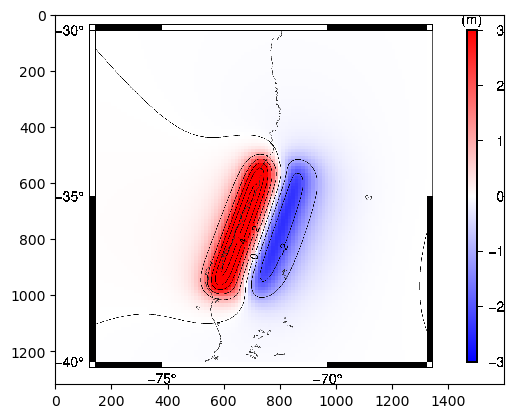

-JX10.0d/10.0d
-R-77.0/-67.0/-40.0/-30.0


PyObject <matplotlib.image.AxesImage object at 0x7f9fa9cc03d0>

In [3]:
# dtopo
dtopo = loaddtopo(simdir)

# commom options: projection J and region R
region = getR(dtopo)
proj = getJ("X10d", axesratio(dtopo))

# check
println("-J"*proj)
println("-R"*region)

# makegrd
G = geogrd(dtopo; V=true)

# makecpt
cpt = GMT.makecpt(; C=:polar, T="-3.0/3.0", D=true)

# plot
GMT.grdimage(G, C=cpt, J=proj, R=region, B="", Q=true)
GMT.colorbar!(C=cpt, J=proj, R=region, B="xa1.0f1.0 y+l\"(m)\"", D="jBR+w10.0/0.3+o-1.5/0.0")
GMT.coast!(J=proj, R=region, D=:i, W="thinnest,gray20")
GMT.grdcontour!(G, J=proj, R=region, B="a5f5 neSW", C=1, A=2, W=:black, fmt="PDF")


# show
PS = GMT.fname_out(Dict())[1]
I = GMT.psconvert("-TG -E300 -A $PS")
PyPlot.imshow(I.image)

### sea surface height

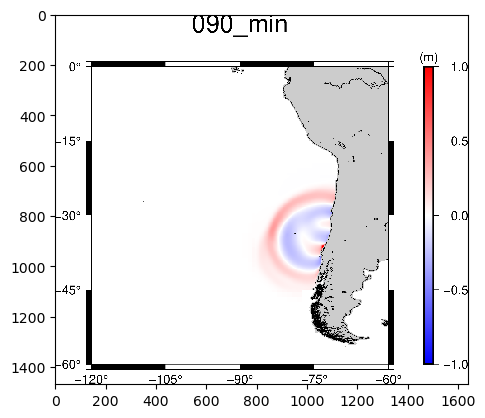

PyObject <matplotlib.image.AxesImage object at 0x7f9fab09b9d0>

In [4]:
# load water surface height
amrall = loadsurface(simdir, 1:5) # fort.q0000 to fort.q0004

# commom options: projection J and region R
region = getR(amrall.amr[1])
proj = getJ("X10d", axesratio(amrall.amr[1]))

# for land masking
landmask_txt = landmask_asc(topo)
Gland = landmask_grd(landmask_txt, R=region, I=topo.dx, S="$(sqrt(2.0)topo.dx)d")

# makecpt
cpt = GMT.makecpt(C=:polar, T="-1.0/1.0", D=true, V=true)


# snapshot: index 4
i = 4

    # step
    time_str = "+t"*@sprintf("%03d", amrall.timelap[i]/60.0)*"_min"

    # land-masked surface grids
    G = tilegrd_mask.(amrall.amr[i], landmask_txt; spacing_unit="d")

    # plot
    GMT.basemap(J=proj, R=region, B=time_str)
    GMT.grdimage!(Gland, R=region, J=proj, C="white,gray80", Q=true)
    GMT.grdimage!.(G, C=cpt, J=proj, R=region, B="", Q=true)
    GMT.colorbar!(C=cpt, J=proj, R=region, B="xa0.5f0.5 y+l(m)", D="jBR+w10.0/0.3+o-1.5/0.0", V=true)
    GMT.coast!(J=proj, R=region, B="a15f15 neSW", D=:i, W=:thinnest, V=true, fmt="PDF")

# show
PS = GMT.fname_out(Dict())[1]
I = GMT.psconvert("-Tg -E300 -A $PS")
PyPlot.imshow(I.image)

### pressure and wind fields

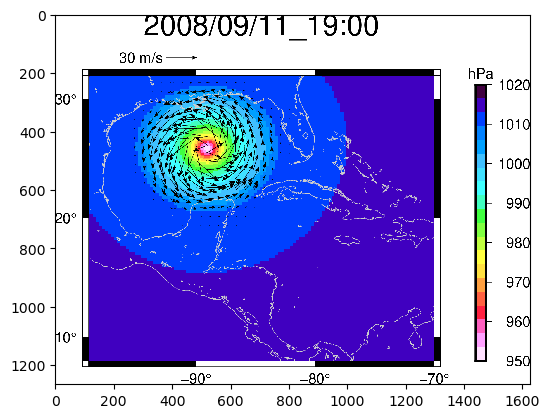

PyObject <matplotlib.image.AxesImage object at 0x7f9f992aa890>

In [5]:
# ike
simdir = joinpath(CLAW,"geoclaw/examples/storm-surge/ike/_output")
using Dates: Dates
timeorigin = Dates.DateTime(2008, 9, 13, 7)

# makecpt
cpt = GMT.makecpt(C=:wysiwyg, T="950/1020", D=true, I=true)

# load
amrall = loadstorm(simdir)
rmvalue_coarser!.(amrall.amr) # avoid to plot unnecessary arrows

# projection and region GMT
region = getR(amrall.amr[1])
proj = getJ("X10d", axesratio(amrall.amr[1]))

# time in string
time_dates = timeorigin .+ Dates.Second.(amrall.timelap)
time_str = Dates.format.(time_dates,"yyyy/mm/dd_HH:MM")

# arrow style
arrow = "0.01/0.15/0.05" # -A LineWidth/HeadLength/HeadSize
vscale = "e0.03/0.0/12"  # -Se <velscale> / <confidence> / <fontsize>
arrow_color = "black" # -G
scalefile = txtwind_scale(-92.5, 30.0, 30.0, 0.0) # for legend

# snapshot: index 7
i = 7

    # surface grids
    G = tilegrd.(amrall.amr[i]; spacing_unit="d")

    # plot pressure field
    GMT.basemap(J=proj, R=region, B="+t"*time_str[i])
    GMT.grdimage!.(G, C=cpt, J=proj, R=region, B="", Q=true)
    GMT.colorbar!(J=proj, R=region, B="xa10f10 y+lhPa", D="jBR+w8.0/0.3+o-1.5/0.0")
    GMT.coast!(J=proj, R=region, B="a10f10 neSW", D=:i, W="thinnest,gray80")

    # plot wind field
    psfile = GMT.fname_out(Dict())[1]
    velofile = txtwind(amrall.amr[i], skip=3)
    GMT.gmt("psvelo $velofile -J$proj -R$region -G$arrow_color -A$arrow -S$vscale -P -K -O >> $psfile ")
    GMT.gmt("psvelo $scalefile -J$proj -R$region -G$arrow_color -A$arrow -S$vscale -Y1.2d -P -O >> $psfile ")


# show
PS = GMT.fname_out(Dict())[1]
I = GMT.psconvert("-Tg -E300 -A $PS")
PyPlot.imshow(I.image)